In [19]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from rdkit.Chem import MACCSkeys
from rdkit import Chem
from rdkit import DataStructs
import matplotlib.pyplot as plt
#from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import r2_score as r2
from sklearn.metrics import mean_squared_error as mse
import math
import xgboost as xgb
from sklearn.ensemble import GradientBoostingRegressor
import keras
from keras.callbacks import EarlyStopping
import sys

In [14]:
train_data=pd.read_csv('t_2_train.csv')
test_data=pd.read_csv('t_2_test.csv')

In [15]:
train_data

,SMILES,terminal t1/2 (h),label
0,[Gd+3].COCCNC(=O)CN(CCN(CCN(CC([O-])=O)CC(=O)N...,1.46,0
1,COc1ccc2CN(C)CC[C@@]34C=C[C@H](O)C[C@@H]3Oc1c24,5.30,1
2,C[C@H](\C=C\[C@H](C)C(C)(C)O)[C@H]1CC[C@H]2\C(...,5.30,1
3,c1(n(c2c(C(=O)c3ccccc3C2=O)[n+]1Cc1cnccn1)CCOC)C,24.80,1
4,COC(=O)[C@H](c1ccccc1Cl)N2CCc3c(ccs3)C2,5.06,1
...,...,...,...
1061,CC(C)[C@@H](CC[C@@H](C)[C@H]1CC[C@H]2[C@@H]3[C...,9.50,1
1062,CC1=C(C=C(C#N)C(=O)N1)c2ccncc2,0.80,0
1063,c1ccc(cc1)CC[C@H](N[C@@H]1C(N2[C@@H](CCC[N@@]2...,50.60,1
1064,c1cc(ccc1O)[C@@H](CN(C)C)C1(CCCCC1)O,8.40,1


In [16]:
from rdkit.Chem import MACCSkeys
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit import DataStructs
def get_finger(smiles):
    all_mols=[]
    for smi in list(smiles):
        m=Chem.MolFromSmiles(smi)
        all_mols.append(m)
    #all_fps=[Chem.RDKFingerprint(mol) for mol in all_mols]
    all_fingerprints1 =[MACCSkeys.GenMACCSKeys(mol).ToBitString() for mol in all_mols]
    all_fingerprints2 =[AllChem.GetMorganFingerprintAsBitVect(mol,2,nBits=1024).ToBitString() for mol in all_mols]
    #all_fingerprints=all_fingerprints1+all_fingerprints2
    #print(all_fingerprints)
    x = []
    for finger in all_fingerprints1:
        x.append(np.fromiter(finger, dtype=int))
    x = np.array(x)
    
    y = []
    for finger in all_fingerprints2:
        y.append(np.fromiter(finger, dtype=int))
    y = np.array(y)
    return x,y

In [25]:
train_smiles=list(train_data.iloc[:,0])
train_labels1=list(train_data.iloc[:,1])
test_smiles=list(test_data.iloc[:,0])
test_labels1=list(test_data.iloc[:,1])

In [26]:
import math
train_labels=np.log10(train_labels1)
test_labels=np.log10(test_labels1)

In [18]:
x_test1,x_test2=get_finger(test_smiles)
x_train1,x_train2=get_finger(train_smiles)
df1 = pd.DataFrame(x_train1)
df2=pd.DataFrame(x_train2)
df=pd.concat([df1,df2],axis=1)
x_train=df.values#as_matrix()

df1 = pd.DataFrame(x_test1)
df2=pd.DataFrame(x_test2)
df=pd.concat([df1,df2],axis=1)
x_test=df.values

In [40]:
rf1=RandomForestRegressor()
rf1.fit(x_train,train_labels)


RandomForestRegressor()

In [41]:
pre_train=rf1.predict(x_train)
pre_test=rf1.predict(x_test)

Text(0, 0.5, 'real')

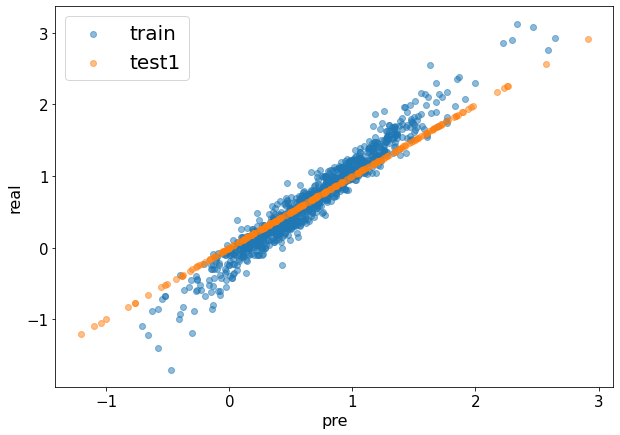

In [45]:
plt.figure(figsize=(10,7))

font2 = {'family' : 'Times New Roman',
'weight' : 'bold',
'size' : 45,
}
plt.scatter(pre_train,train_labels, alpha=.5, label='train')
plt.scatter(test_labels,test_labels, alpha=.5, label='test1')
#plt.scatter(newX3[:, 0], newX3[:, 1], alpha=.5, label='test2')
plt.legend()
plt.tick_params(labelsize=15)
plt.legend(prop={'family' : 'Times NewRoman', 'size'   : 20})
plt.xlabel('pre',fontsize=16)
plt.ylabel('real',fontsize=16)
#plt.show()

In [43]:
r2(train_labels,pre_train)

0.8978973102827863

In [44]:
r2(test_labels,pre_test)

0.2339795598075246

In [ ]:
np.sqrt(mean_squared_error(y_true,y_pred))
